# Modeling and Evaluating

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, validation_curve, learning_curve, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import category_encoders as ce
import graphviz

## Modeling

In [2]:
x = pd.read_csv('data/x.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis=1)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [4]:
model = Lasso()
model.fit(x_train, y_train)

/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.075524974027774e+18, tolerance: 7508039153341154.0
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [5]:
predicted = model.predict(x_test)
predicted

array([ 3.74985061e+08,  1.40430463e+08,  4.02565287e+07, ...,
       -1.91084679e+07,  1.08047130e+07,  3.35597394e+07])

(array([[768., 644., 142.,  54.,  23.,   8.,   3.,   0.,   0.,   0.],
        [920., 487., 128.,  36.,  27.,  19.,  11.,   8.,   5.,   1.]]),
 array([-1.03758092e+08,  4.70883041e+07,  1.97934700e+08,  3.48781096e+08,
         4.99627492e+08,  6.50473888e+08,  8.01320284e+08,  9.52166680e+08,
         1.10301308e+09,  1.25385947e+09,  1.40470587e+09]),
 <a list of 2 BarContainer objects>)

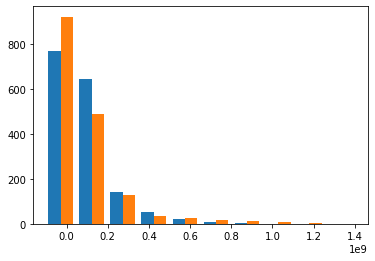

In [6]:
plt.hist([predicted, y_test])

## Evaluation

In [7]:
model.score(x_test, y_test)

0.5702296223904745

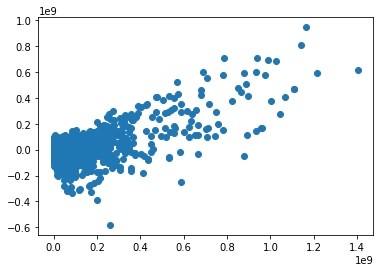

In [8]:
residuals = y_test - predicted

plt.scatter(y_test,residuals)

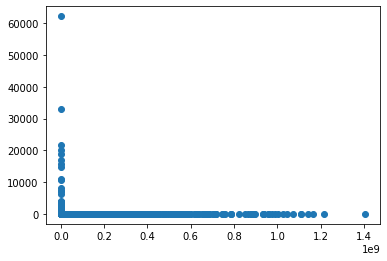

In [9]:
ap_residuals = np.abs(residuals) / y_test
plt.scatter(y_test, ap_residuals)

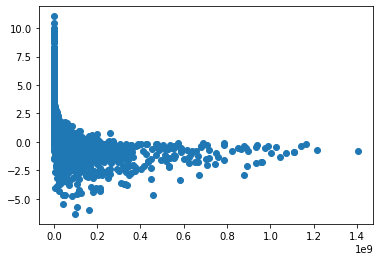

In [10]:
lap_residuals = np.log(ap_residuals)
plt.scatter(y_test, lap_residuals)

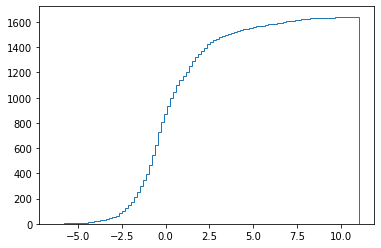

In [11]:
plt.hist(lap_residuals, bins=100, histtype='step', cumulative=True);

## Feature Engineering

In [12]:
x.corr()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
production_budget,1.000000,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154
title_year,0.207884,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765
duration,0.276407,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642
cast_total_facebook_likes,0.236820,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663
budget,0.185357,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000


<AxesSubplot:>

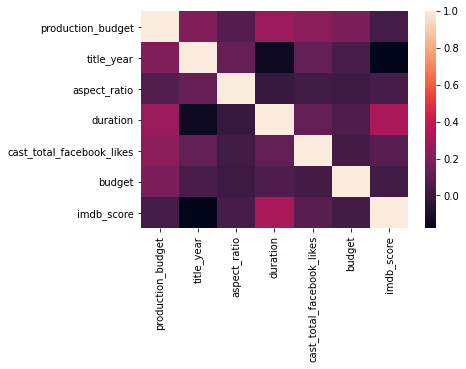

In [13]:
sns.heatmap(x.corr())

## Feedback of the models

In [14]:
x

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5
...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [16]:
x_train

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
3071,7000000.0,1983.0,2.126976,100.000000,11059.0,7.000000e+06,4.8
3655,2000000.0,2000.0,2.126976,108.577186,613.0,4.045539e+07,2.8
2152,18000000.0,1986.0,1.850000,103.000000,14672.0,1.800000e+07,6.3
3914,600000.0,1977.0,1.850000,83.000000,190.0,6.500000e+05,6.5
2494,13200000.0,2014.0,2.350000,84.000000,2297.0,1.320000e+07,5.6
...,...,...,...,...,...,...,...
3080,7000000.0,2005.0,2.350000,97.000000,2544.0,7.000000e+06,6.9
3719,1500000.0,2013.0,1.780000,104.000000,2667.0,1.500000e+06,5.8
467,75000000.0,2013.0,2.350000,125.000000,13312.0,7.500000e+07,7.3
2956,8000000.0,2006.0,2.350000,112.000000,2832.0,4.045539e+07,7.5


In [17]:
model = Lasso()
model.fit(x_train, y_train)

Lasso()

In [18]:
model.score(x_test, y_test)

0.5430193701278324

In [19]:
model.coef_

array([ 3.00454087e+00, -1.79613319e+05, -7.08520206e+06, -1.10252501e+04,
        1.53897288e+02, -1.01853643e-02,  2.76574326e+07])

In [20]:
var = np.floor(np.log10(np.abs(model.coef_)))

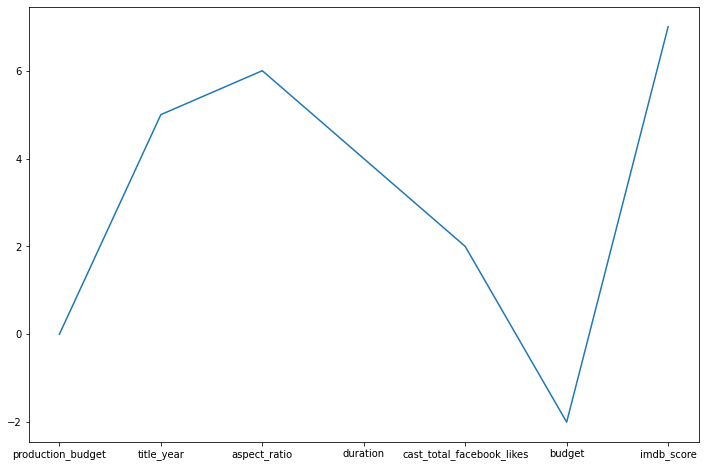

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(var)
plt.xticks(np.arange(7), list(x.columns));

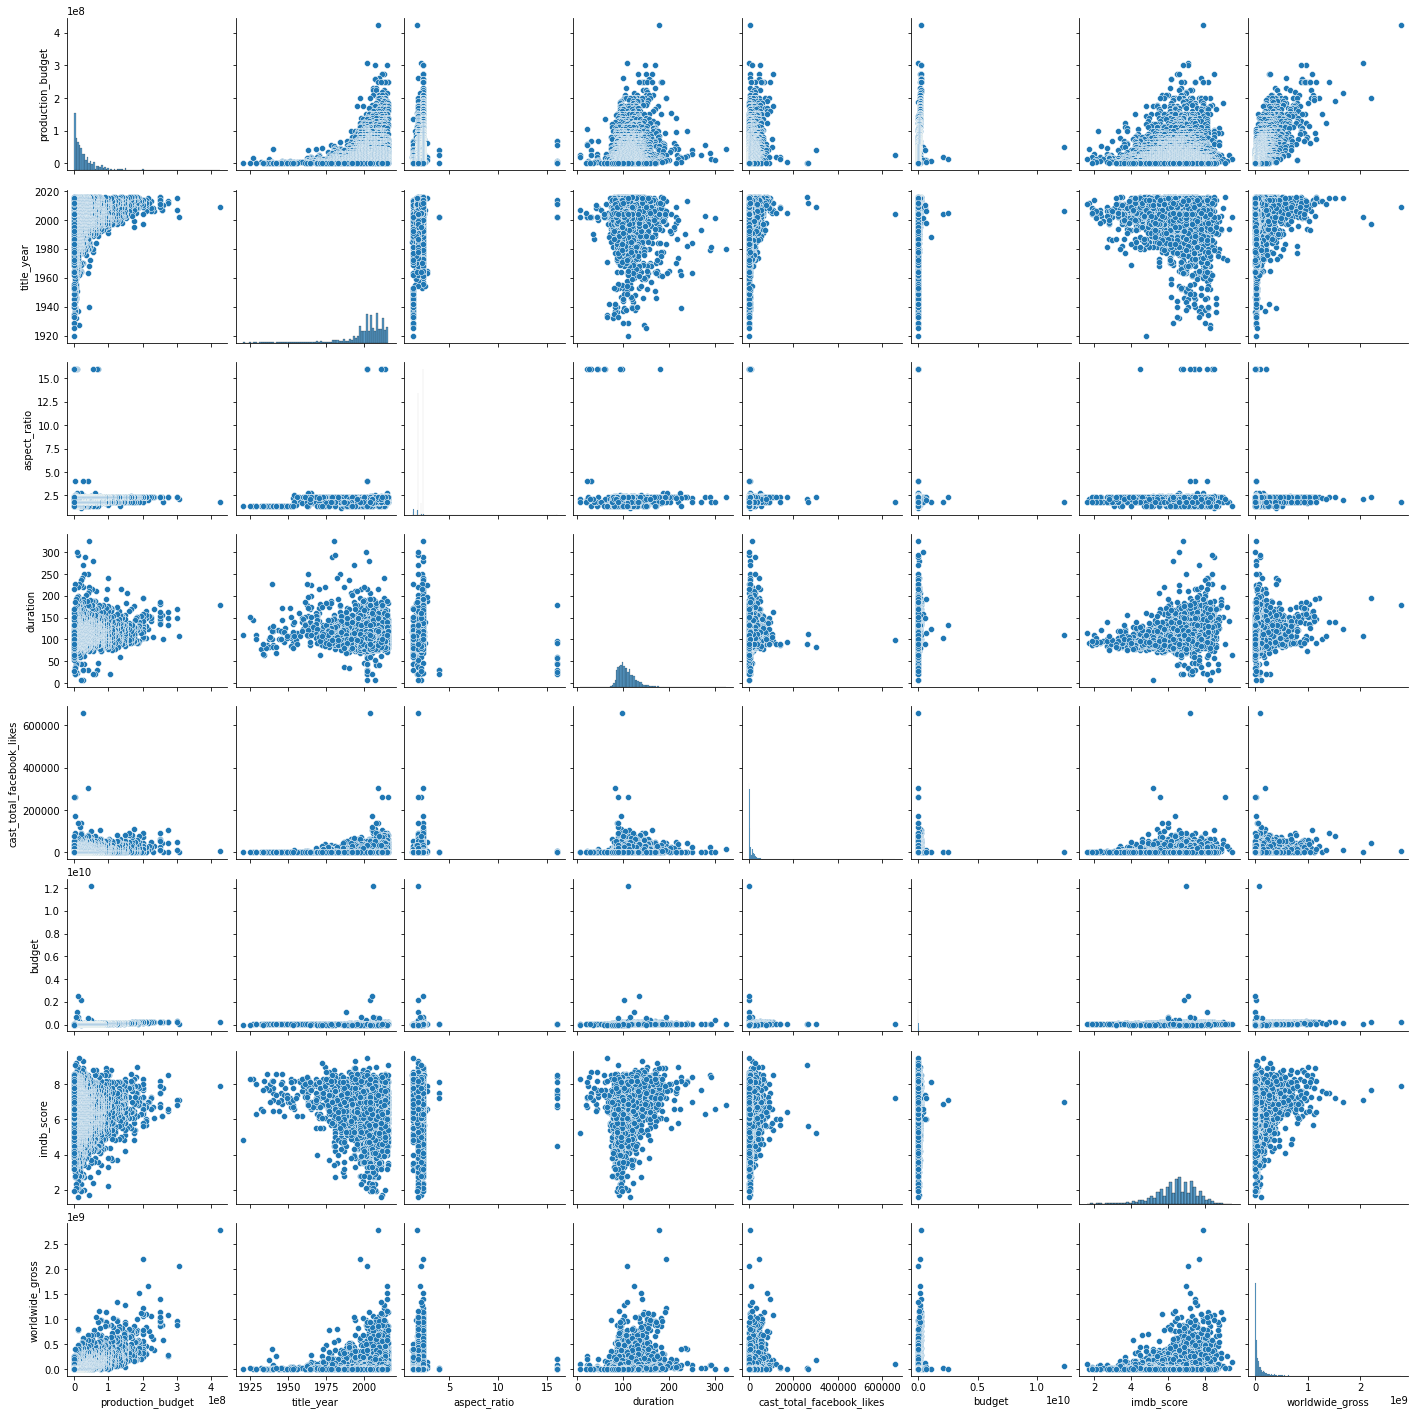

In [22]:
z = pd.concat([x, y], axis=1)
sns.pairplot(z)

In [23]:
class_budget = pd.cut(x['production_budget'],8).cat.codes.rename('class')
z2 = pd.concat([x, class_budget], axis=1)

/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/si

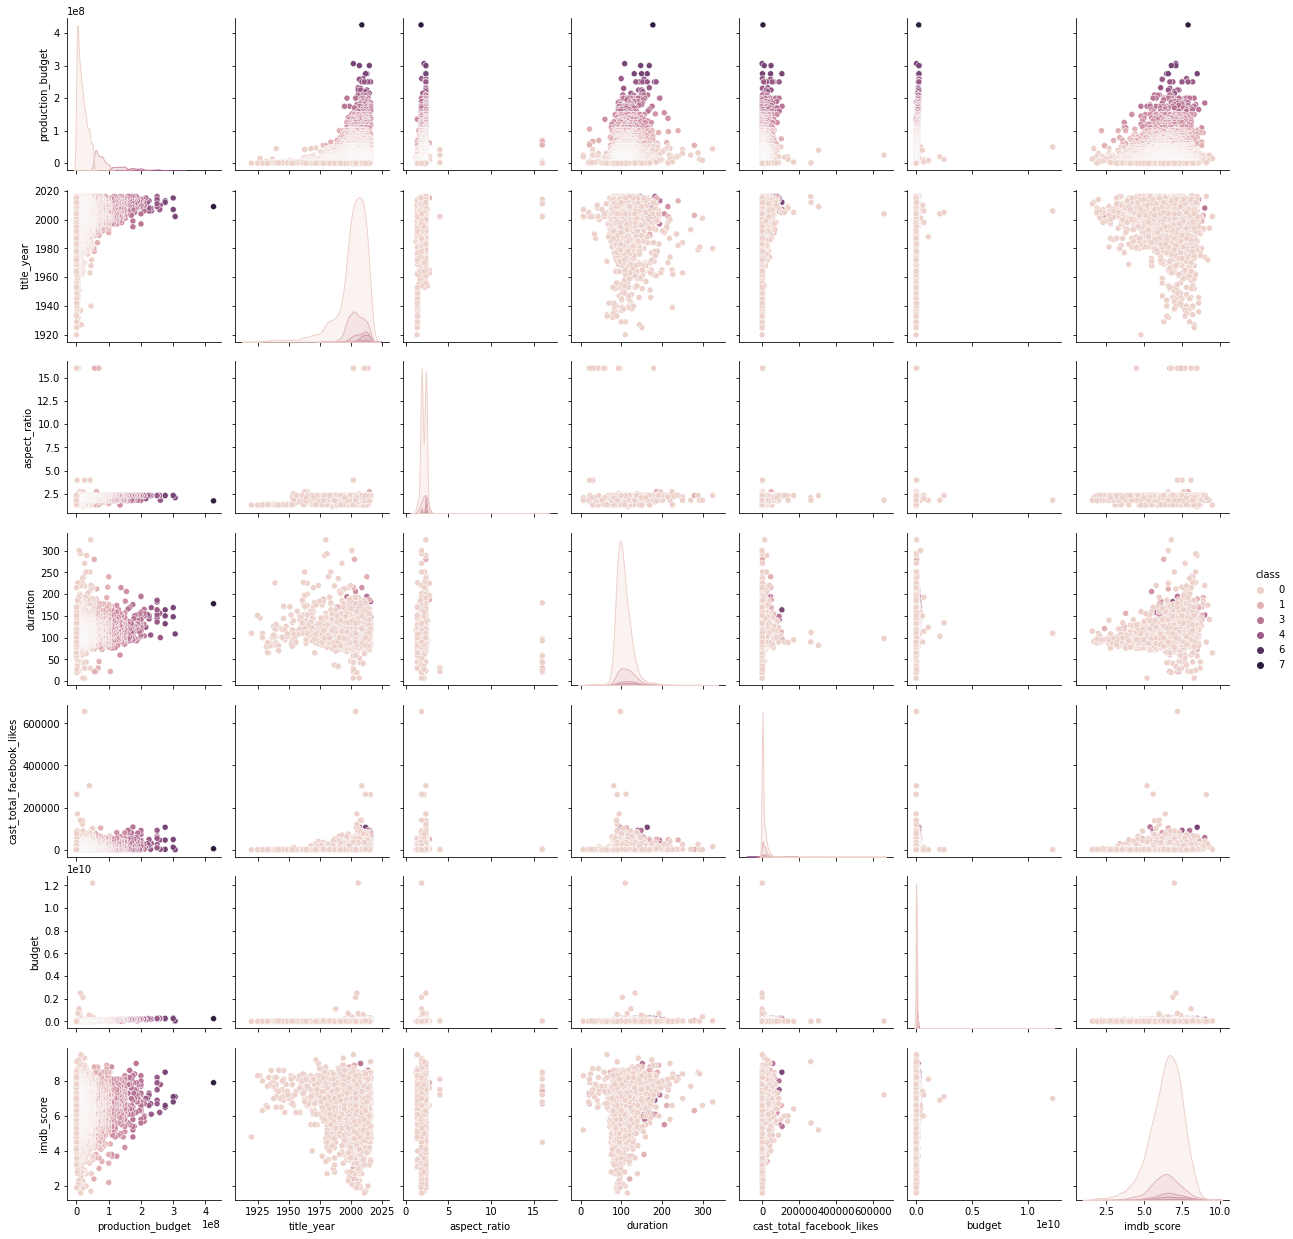

In [24]:
sns.pairplot(z2, hue='class')

<AxesSubplot:>

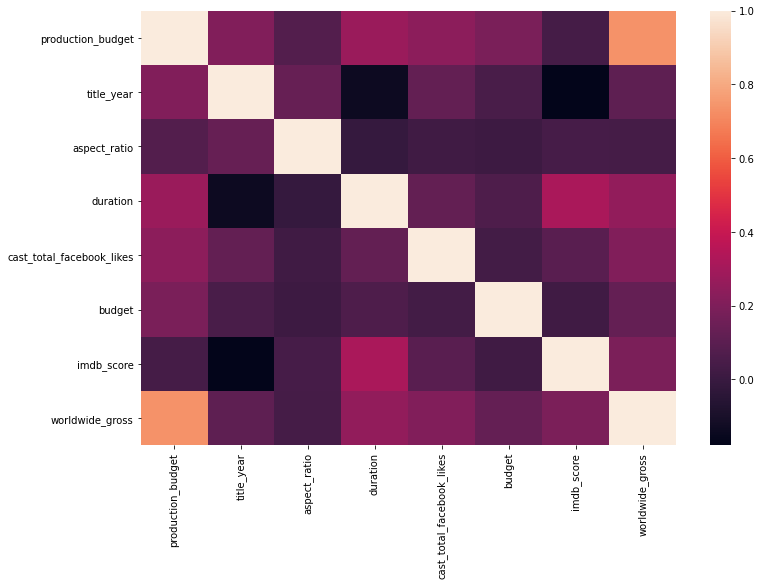

In [25]:
z3 = pd.concat([x, y], axis=1)
sns.heatmap(z3.corr())

## Selecting the best features

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   production_budget          4104 non-null   float64
 1   title_year                 4104 non-null   float64
 2   aspect_ratio               4104 non-null   float64
 3   duration                   4104 non-null   float64
 4   cast_total_facebook_likes  4104 non-null   float64
 5   budget                     4104 non-null   float64
 6   imdb_score                 4104 non-null   float64
dtypes: float64(7)
memory usage: 224.6 KB


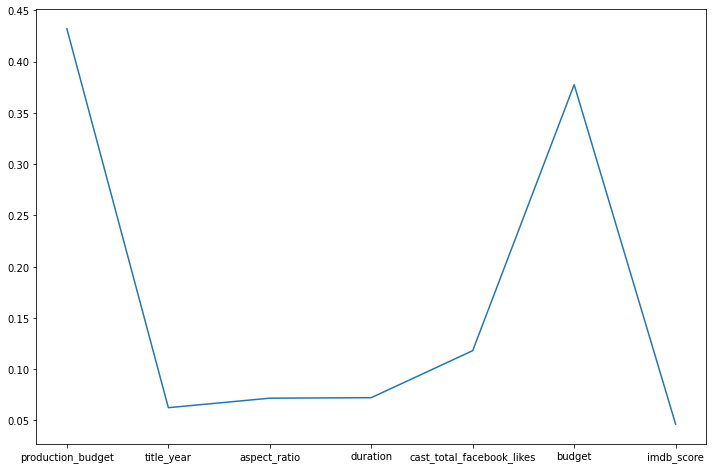

In [27]:
selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(x,y)
scores = selector.scores_

plt.plot(scores)
plt.xticks(np.arange(7), list(x.columns));

In [28]:
x2 = x[[
    'production_budget',
    'title_year',
    'duration',
    'cast_total_facebook_likes',
    'imdb_score'
]]

x3 = x[[
    'production_budget',
    'cast_total_facebook_likes',
    'imdb_score'
]]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [30]:
cols2 = [
    'production_budget',
    'title_year',
    'duration',
    'cast_total_facebook_likes',
    'imdb_score'
]

x2_train, x2_test, y2_train, y2_test = x_train[cols2], x_test[cols2], y_train, y_test

In [31]:
cols3 = [
    'production_budget',
    'cast_total_facebook_likes',
    'imdb_score'
]

x3_train, x3_test, y3_train, y3_test = x_train[cols3], x_test[cols3], y_train, y_test

In [32]:
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(x_train, y_train)
model2.fit(x2_train, y2_train)
model3.fit(x3_train, y3_train)

Lasso()

In [33]:
print(model1.score(x_test, y_test))
print(model2.score(x2_test, y2_test))
print(model3.score(x3_test, y3_test))

0.4978429630780784
0.49773912089589867
0.49799661299324416


## Scalating

In [34]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [35]:
scaler.mean_

array([3.32084675e+07, 2.00207841e+03, 2.12711854e+00, 1.08331397e+02,
       1.02611303e+04, 4.11975357e+07, 6.45201429e+00])

In [36]:
scaler.scale_

array([4.11750904e+07, 1.22261342e+01, 7.19017937e-01, 2.28579554e+01,
       1.97159321e+04, 2.31721146e+08, 1.07650231e+00])

In [37]:
scaler.transform(x_train)

array([[-0.5636531 ,  0.81150652,  0.3099804 , ..., -0.1275177 ,
        -0.13463396,  0.23036245],
       [ 0.28637539, -0.33358151,  0.3099804 , ...,  0.70723868,
         0.34007455,  0.69482964],
       [-0.63651269, -0.0064135 , -0.38541255, ..., -0.38431509,
        -0.14758056,  0.13746901],
       ...,
       [-0.32078782,  0.32075451, -0.38541255, ..., -0.40962457,
        -0.09147864, -3.39248163],
       [-0.32078782, -0.66074952,  0.3099804 , ..., -0.43970177,
        -0.09147864, -0.04831787],
       [-0.19935518,  0.48433851,  0.3099804 , ..., -0.43173867,
        -0.14326502, -0.51278506]])

In [38]:
x_train_scaled, x_test_scaled = (scaler.transform(x_train), scaler.transform(x_test))

In [39]:
regular_model = Lasso()
scaled_model = Lasso()

regular_model.fit(x_train, y_train)
scaled_model.fit(x_train_scaled, y_train)

Lasso()

In [40]:
print(regular_model.score(x_test, y_test))
print(scaled_model.score(x_test_scaled, y_test))

0.4978429630780784
0.4978429637178786


## Create new features

In [41]:
A = np.arange(6).reshape(3,2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [44]:
transformer = PolynomialFeatures(2)
transformer.fit_transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [47]:
transformer = PolynomialFeatures(2)
transformer.fit_transform(x).shape

(4104, 36)

In [51]:
model_poly = make_pipeline(PolynomialFeatures(2), Lasso())
model_poly.fit(x_train, y_train)
model.score(x_test, y_test)

/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4761256419846963e+19, tolerance: 9182589559563430.0
  model = cd_fast.enet_coordinate_descent(


0.50002205581876

## Categorical Features

In [ ]:
!pipenv install category_encoders

In [59]:
movies_obj = pd.read_csv('data/obj_cols.csv')
categoricals = movies_obj[['actor_1_name', 'director_name']].copy()

In [60]:
categoricals.fillna(0, inplace=True)

In [61]:
x_binenc = pd.concat([x, categoricals], axis=1)
x_binenc

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,actor_1_name,director_name
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,CCH Pounder,James Cameron
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,Johnny Depp,Gore Verbinski
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,Christoph Waltz,Sam Mendes
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,Tom Hardy,Christopher Nolan
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,Doug Walker,Doug Walker
...,...,...,...,...,...,...,...,...,...
5038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eric Mabius,Scott Smith
5039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natalie Zea,0
5040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eva Boehnke,Benjamin Roberds
5041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alan Ruck,Daniel Hsia


In [63]:
encoder = ce.BinaryEncoder(cols=['actor_1_name', 'director_name'])

In [65]:
x_binenc = encoder.fit_transform(x_binenc)

/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
xb_train, xb_test, y_train, y_test = train_test_split(x_binenc, y)
x_train, x_test = xb_train[x.columns], xb_test[x.columns]

## Cross Validation

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
x_train.head(5)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
2989,8000000.0,2002.130733,2.126976,142.0,29196.0,4.045539e+07,7.7
2608,12000000.0,2013.000000,2.350000,115.0,3798.0,1.200000e+07,7.8
220,113500000.0,2008.000000,2.350000,116.0,1609.0,7.800000e+07,5.1
3090,6800000.0,1999.000000,1.850000,125.0,333.0,1.500000e+07,7.3
3710,1500000.0,2010.000000,2.350000,103.0,3030.0,1.500000e+06,6.8


In [72]:
scores = cross_val_score(Lasso(), x, y, cv=5, scoring='r2')
scores

/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.286019418125148e+17, tolerance: 1863339443372760.8
  model = cd_fast.enet_coordinate_descent(
/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.343698377854873e+19, tolerance: 1.1721673774862474e+16
  model = cd_fast.enet_coordinate_descent(
/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8393230416695

array([ 0.34596047, -0.00589953,  0.01820583, -0.1295255 , -1.29742036])

In [73]:
scores.mean()

-0.2137358179923013

In [75]:
Lasso().fit(x_train, y_train).score(x_test, y_test)

0.5731124344715528

## Selection of the model

In [77]:
results = cross_validate(Lasso(), x, y, return_train_score=True, cv=5)
results

/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.286019418125148e+17, tolerance: 1863339443372760.8
  model = cd_fast.enet_coordinate_descent(
/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.343698377854873e+19, tolerance: 1.1721673774862474e+16
  model = cd_fast.enet_coordinate_descent(
/Users/mmenendezg/.local/share/virtualenvs/Data-Science-Career-_Uyt2p2S/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8393230416695

{'fit_time': array([0.06958389, 0.06253695, 0.07370996, 0.00767517, 0.0931232 ]),
 'score_time': array([0.00641704, 0.00574374, 0.00555491, 0.00711894, 0.00542474]),
 'test_score': array([ 0.34596047, -0.00589953,  0.01820583, -0.1295255 , -1.29742036]),
 'train_score': array([0.20885656, 0.60086178, 0.58835651, 0.57394493, 0.5551099 ])}

In [78]:
print(np.mean(results['test_score']))
print(np.mean(results['train_score']))

-0.2137358179923013
0.5054259351628053


## Validation curves and learning curves

In [82]:
cross_validate(KNeighborsRegressor(), x, y, cv=5)

{'fit_time': array([0.00971985, 0.00808382, 0.0054431 , 0.00582027, 0.00922585]),
 'score_time': array([0.01034689, 0.01263595, 0.00876474, 0.00892901, 0.01235104]),
 'test_score': array([-0.19036652, -0.42697567, -0.13481724, -0.37093233, -0.5934082 ])}

In [83]:
cross_validate(KNeighborsRegressor(n_neighbors=10), x, y, cv=5)

{'fit_time': array([0.01259875, 0.00736713, 0.01121187, 0.00821829, 0.01279616]),
 'score_time': array([0.0086081 , 0.00805497, 0.0107801 , 0.01575398, 0.00940609]),
 'test_score': array([-0.21874269, -0.27239647, -0.13672804, -0.58333997, -0.95777815])}

In [86]:
n = np.arange(2, 50, 2)
train_scores, test_scores = validation_curve(
    KNeighborsRegressor(), 
    x, 
    y, 
    param_name='n_neighbors',
    param_range=n,
    cv=5
)

In [87]:
np.mean(train_scores, axis=1)

array([0.74920277, 0.62678185, 0.56846023, 0.53832442, 0.52449964,
       0.51361749, 0.50636037, 0.49996546, 0.48957203, 0.48039467,
       0.47543295, 0.4702993 , 0.46479554, 0.46252528, 0.46227927,
       0.46070064, 0.45863591, 0.4576271 , 0.45424977, 0.45352116,
       0.45137622, 0.45136044, 0.45111722, 0.45039464])

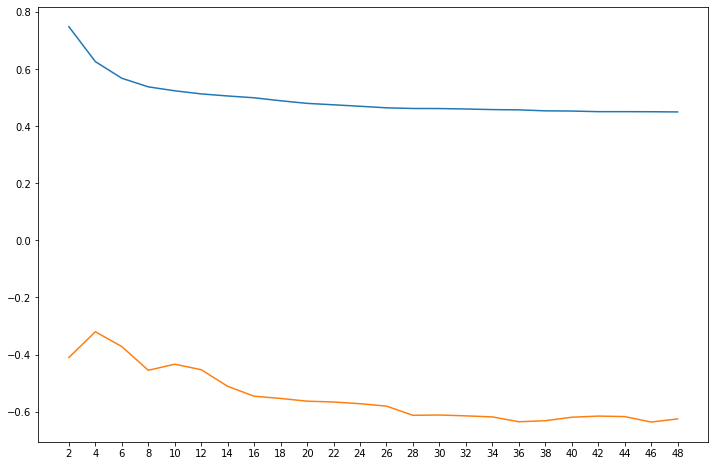

In [90]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.xticks(np.arange(24), n);

In [92]:
np.mean(test_scores, axis=1)

array([-0.4103011 , -0.32007832, -0.37201443, -0.45514651, -0.43379706,
       -0.45310465, -0.51141343, -0.54605837, -0.55386986, -0.56341837,
       -0.56627377, -0.57231122, -0.58069692, -0.61299438, -0.61191755,
       -0.61487036, -0.61854367, -0.63552573, -0.63194585, -0.61967272,
       -0.61568666, -0.61743081, -0.63651871, -0.62560577])

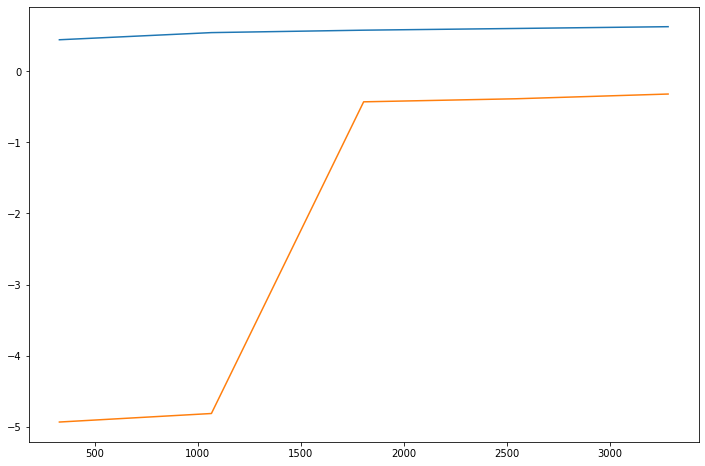

In [94]:
lc = learning_curve(KNeighborsRegressor(n_neighbors=4), x, y, cv=5)
samples, train, test = lc[0], lc[1], lc[2]
plt.plot(samples, np.mean(train, axis=1))
plt.plot(samples, np.mean(test, axis=1))

## Ensembles and Decision Trees

In [108]:
model = DecisionTreeRegressor(max_depth=2)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

## Random Forest

In [112]:
forest = RandomForestRegressor(200)
results = cross_validate(forest, x, y, scoring='r2')

In [116]:
results

{'fit_time': array([4.07629275, 4.27415895, 4.4391551 , 4.08899307, 4.78593922]),
 'score_time': array([0.06317711, 0.05657101, 0.06327486, 0.06382895, 0.07094765]),
 'test_score': array([-0.12203309, -0.03339528,  0.05798723, -0.20342828, -3.58514583])}

## Gradient Boosted Trees

In [121]:
ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, x, y, scoring='r2')
print(np.mean(results['test_score']))

-0.11653053538392318


# Production Modeling

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

param_test = {'n_estimators': range(20, 501, 20)}

list(param_test['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [124]:
estimator = GradientBoostingRegressor(
    learning_rate=0.1,
    min_samples_split=500,
    min_samples_leaf=50,
    max_depth=8,
    max_features='sqrt',
    subsample=0.8,
    random_state=10
)

gsearch = GridSearchCV(estimator, param_grid=param_test, scoring='r2', cv=5)

In [125]:
gsearch.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'n_estimators': range(20, 501, 20)}, scoring='r2')

In [128]:
gsearch.best_params_, gsearch.best_score_

({'n_estimators': 220}, 0.5897188249703511)

In [130]:
final_result = cross_validate(gsearch.best_estimator_, x_train, y_train)
final_result

{'fit_time': array([0.68092704, 0.62811685, 0.68315387, 0.59395075, 0.68226099]),
 'score_time': array([0.01108408, 0.00902295, 0.01371288, 0.0065701 , 0.01177001]),
 'test_score': array([0.67277549, 0.56439543, 0.54763905, 0.57496265, 0.5888215 ])}

## Final Estimator

In [131]:
estimator = GradientBoostingRegressor(
    learning_rate=0.1,
    min_samples_split=500,
    min_samples_leaf=50,
    max_depth=8,
    max_features='sqrt',
    subsample=0.8,
    random_state=10,
    n_estimators=220
)

estimator.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, n_estimators=220,
                          random_state=10, subsample=0.8)

In [132]:
estimator.score(x_test, y_test)

0.6072087711540903